In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import requests
import zipfile
import math

In [2]:
# Create a directory to store the dataset
os.makedirs('data', exist_ok=True)

In [3]:
# URL of the dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

In [4]:
# Download the dataset
response = requests.get(url)
zip_path = os.path.join('data', 'cats_and_dogs_filtered.zip')

In [5]:
# Save the downloaded zip file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded and saved.")

Dataset downloaded and saved.


In [6]:
# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

print("Dataset extracted.")

Dataset extracted.


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Paths to training and validation data
base_dir = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
# Normalization for validation
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [12]:
# Generators for reading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [13]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [16]:
# Calculate steps per epoch
train_steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps_per_epoch = math.ceil(validation_generator.samples / validation_generator.batch_size)

In [17]:
# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [20]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch
)

Epoch 1/20


63/63 [==============================] - 25s 376ms/step - loss: 0.7045 - accuracy: 0.5065 - val_loss: 0.6927 - val_accuracy: 0.5010
Epoch 2/20
63/63 [==============================] - 22s 355ms/step - loss: 0.6894 - accuracy: 0.5135 - val_loss: 0.6647 - val_accuracy: 0.5760
Epoch 3/20
63/63 [==============================] - 22s 354ms/step - loss: 0.6736 - accuracy: 0.5765 - val_loss: 0.6499 - val_accuracy: 0.6200
Epoch 4/20
63/63 [==============================] - 23s 356ms/step - loss: 0.6603 - accuracy: 0.5895 - val_loss: 0.6495 - val_accuracy: 0.6020
Epoch 5/20
63/63 [==============================] - 22s 351ms/step - loss: 0.6567 - accuracy: 0.5845 - val_loss: 0.6499 - val_accuracy: 0.5780
Epoch 6/20
63/63 [==============================] - 22s 353ms/step - loss: 0.6641 - accuracy: 0.5990 - val_loss: 0.6733 - val_accuracy: 0.5600
Epoch 7/20
63/63 [==============================] - 24s 373ms/step - loss: 0.6560 - accuracy: 0.6210 - val_loss: 0.6480 - val_accuracy: 0.59

In [21]:
# Plotting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
epochs = range(len(acc))

<Figure size 640x480 with 0 Axes>

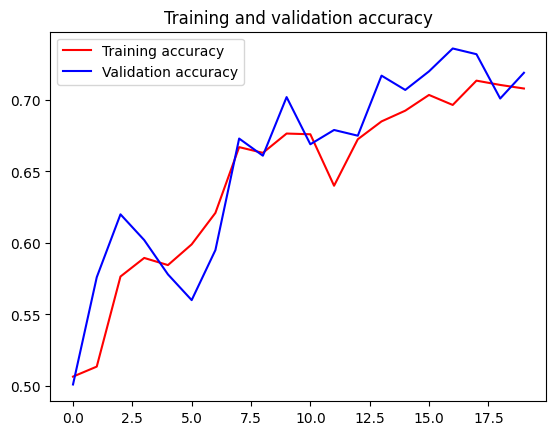

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

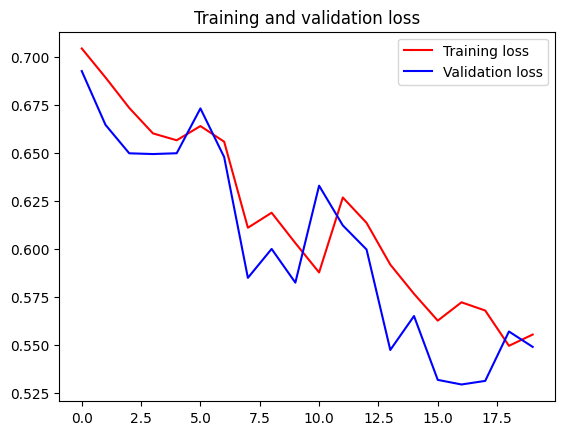

In [24]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
# Saving the model
model.save('cats_and_dogs_classifier.h5')

C:\Users\Rugved Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Inference example
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [27]:
# Load the model
model = load_model('cats_and_dogs_classifier.h5')

In [30]:
# Load and preprocess the image
img_path = r"C:\Users\Rugved Joshi\OneDrive\Desktop\dog.jpeg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [31]:
# Make prediction
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 145ms/step
It's a dog!
